In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("../../assets/student_performance.csv")

In [3]:
df.head()

,Hours_Studied,Previous_Exam_Score,Attendance_Percentage,Final_Exam_Score
0,5.5,65,85,72
1,6.2,70,91,78
2,4.8,58,78,65
3,7.5,82,95,88
4,3.1,45,60,52


In [4]:
df.tail()

,Hours_Studied,Previous_Exam_Score,Attendance_Percentage,Final_Exam_Score
25,2.8,40,58,48
26,7.0,78,93,84
27,5.1,61,81,68
28,3.3,46,63,53
29,8.6,89,97,94


In [5]:
print("Columns:", df.columns.tolist())

Columns: ['Hours_Studied', 'Previous_Exam_Score', 'Attendance_Percentage', 'Final_Exam_Score']


In [6]:
print(df.dtypes)

Hours_Studied            float64
Previous_Exam_Score        int64
Attendance_Percentage      int64
Final_Exam_Score           int64
dtype: object


### Data Preprocess

- Handle null values first

In [7]:
df.isnull().sum()

Hours_Studied            0
Previous_Exam_Score      0
Attendance_Percentage    0
Final_Exam_Score         0
dtype: int64

In [8]:
df.head()

,Hours_Studied,Previous_Exam_Score,Attendance_Percentage,Final_Exam_Score
0,5.5,65,85,72
1,6.2,70,91,78
2,4.8,58,78,65
3,7.5,82,95,88
4,3.1,45,60,52


Then Split data in to input and output (Columnwise)

In [9]:
FEATURES = ["Hours_Studied", "Previous_Exam_Score", "Attendance_Percentage"]
TARGET = "Final_Exam_Score"

X = df[FEATURES].copy()
Y = df[TARGET].astype(float).copy()

Features are Input and Targets are the output
- astype = This attribute convert data type to another
- dtype = Shows the data type

In [10]:
print(Y)

0     72.0
1     78.0
2     65.0
3     88.0
4     52.0
5     95.0
6     45.0
7     81.0
8     98.0
9     58.0
10    69.0
11    85.0
12    55.0
13    90.0
14    40.0
15    75.0
16    73.0
17    62.0
18    89.0
19    50.0
20    97.0
21    70.0
22    79.0
23    60.0
24    92.0
25    48.0
26    84.0
27    68.0
28    53.0
29    94.0
Name: Final_Exam_Score, dtype: float64


In [11]:
print(X.shape)
# print the result, has 30 rows & three columns 
print(Y.shape)
# print the result, has 30 rows & one column

(30, 3)
(30,)


Split data in to Training set and Testing set (Rowwise)

In [12]:
X_train, X_test,Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42) 

In [13]:
print(X_train.shape)
print(X_test.shape)

(24, 3)
(6, 3)


In [14]:
print(Y_train.shape)
print(Y_test.shape)

(24,)
(6,)


 Feature Enginnering
- Bring columns in to a standard scale

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)   # fit on train only
X_test_scaled  = scaler.transform(X_test)

print("Scaled sample (first 3 rows of train):\n", X_train_scaled[:3])

Scaled sample (first 3 rows of train):
 [[-1.16289792 -1.1107986  -1.19750879]
 [ 1.15902804  1.18834922  0.969159  ]
 [-0.93070532 -1.00131537 -1.07005775]]


In [16]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Modal evaluation

In [17]:
y_pred_lin = lin_reg.predict(X_test_scaled)

In [18]:
def print_regression_metrics(name, y_true, y_pred):
    mae  = mean_absolute_error(y_true, y_pred)
    mse  = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse) # Calculate RMSE from MSE
    r2   = r2_score(y_true, y_pred)
    print(f"MAE  : {mae:.4f}")
    print(f"RMSE : {rmse:.4f}")
    print(f"R^2  : {r2:.4f}\n")

print_regression_metrics("Linear Regression (scaled)", Y_test, y_pred_lin)

MAE  : 0.4937
RMSE : 0.5282
R^2  : 0.9985



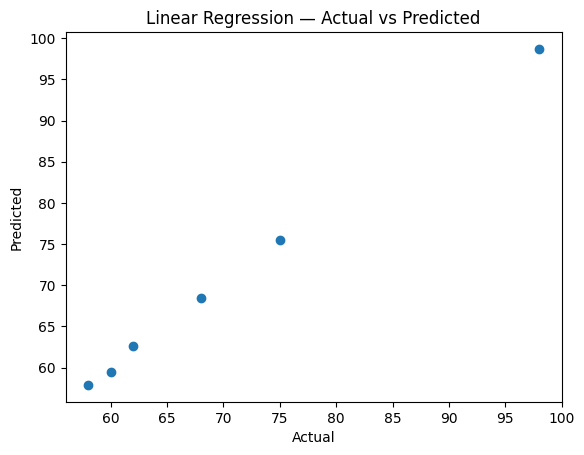

In [19]:

def residual_plots(y_true, y_pred, title_prefix):
    residuals = y_true - y_pred

    # 1) Actual vs Predicted
    plt.figure()
    plt.scatter(y_true, y_pred)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"{title_prefix} — Actual vs Predicted")
    plt.show()

residual_plots(Y_test, y_pred_lin,  "Linear Regression")

In [20]:
import numpy as np
import pandas as pd

def predict_score_single(hours_studied: float, previous_exam_score: float, attendance_percentage: float):

    row = np.array([[hours_studied, previous_exam_score, attendance_percentage]], dtype=float)
    row_scaled = scaler.transform(row)
    pred = float(lin_reg.predict(row_scaled)[0])
    return {"predicted_final_exam_score": pred}

def predict_score_batch(df_new: pd.DataFrame) -> pd.DataFrame:
    # Ensure required columns exist
    missing = [c for c in FEATURES if c not in df_new.columns]
    if missing:
        raise ValueError(f"Missing required column(s): {missing}")

    X_new = df_new[FEATURES].values.astype(float)
    X_new_scaled = scaler.transform(X_new)
    preds = lin_reg.predict(X_new_scaled)

    out = df_new.copy()
    out["predicted_final_exam_score"] = preds
    return out

# Quick test
print(predict_score_single(6.0, 70, 90))

{'predicted_final_exam_score': 77.19686270247797}


c:\Users\liyan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
